## RGB

One of the most useful analysis techniques is to view data at multiple wavelengths.

`ds9` makes this easy to do with it's 3-channel `RGB` (Red, Green, Blue) support.


### Energy

The most common RGB images are made in different energies.  In this example I'll show
an example using the CSC energy bands.


### Data

This example uses data from _IC443_.  I used `fluximage` to create the exposure corrected images in 4 energy bands:  `broad`, `soft`, `medium`, and `hard`.


[IC443, OBS_ID 13736](http://cda.harvard.edu/srservices/ocatDetails.do?obsid=13736)


```bash
download_chandra_obsid 13736
chandra_repro 13736 out=
fluximage 13736 out=./ bands=broad,csc bin=4 
dmimgadapt "broad_flux.img[sky=region(acisf13736_000N001_fov1.fits.gz)][opt full]" \
  outfile="broad_flux.asm" radfile="broad.radii" \
  function="gaussian" minrad="0.5" maxrad="45" numrad="100" radscale="linear" 
dmimgcalc broad_flux.asm none broad_flux.log exp="imgout=log(img1)"
```

In the last step I've taken the natural `log` of the pixel values.  This step isn't necessary it just makes setting the limits below a little easier.


In [1]:
cd RGB;
ds9 -scale limits -8.5 -4 broad_flux.log &
sleep 5

[1] 20088


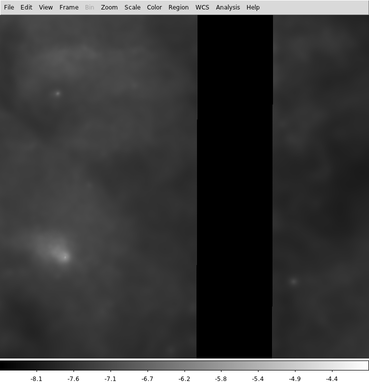

In [2]:
xpaset -p ds9 view info no
xpaset -p ds9 view buttons no
xpaset -p ds9 view panner no
xpaset -p ds9 view magnifier no
xpaset -p ds9 pan to 4586.5 4390.5 physical

import -window "SAOImage ds9" -resize 50% ds9_05_rgb_01.png 
display < ds9_05_rgb_01.png

In [3]:
xpaset -p ds9 quit

: 1

---

### Separate Frames


```bash
for band in soft medium hard
do
  dmimgadapt "${band}_flux.img[sky=region(acisf13736_000N001_fov1.fits.gz)][opt full]" \
      outfile="${band}_flux.asm" inradfile="broad.radii" \
      function="gaussian" minrad="0.5" maxrad="45" numrad="100" radscale="linear" 
      
  dmimgcalc "${band}_flux.asm" none "${band}_flux.log" exp="imgout=log(img1)"
done
```



In [4]:
ds9 -scale limits -8.5 -4 -scale linear  \
  soft_flux.log -cmap load my_red.lut  \
  medium_flux.log -cmap load my_grn.lut  \
  hard_flux.log -cmap load my_blu.lut \
  -tile column &
sleep 5

[1] 20303


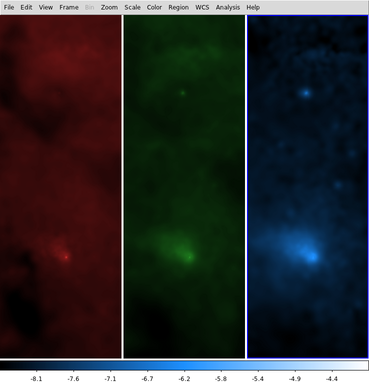

In [5]:
xpaset -p ds9 view info no
xpaset -p ds9 view buttons no
xpaset -p ds9 view panner no
xpaset -p ds9 view magnifier no

xpaset -p ds9 pan to 4086.5 4390.5 physical
xpaset -p ds9 match frame wcs

import -window "SAOImage ds9" -resize 50% ds9_05_rgb_02.png 
display < ds9_05_rgb_02.png

In [6]:
xpaset -p ds9 quit

[1]+  Done                    ds9 -scale limits -8.5 -4 -scale linear soft_flux.log -cmap load my_red.lut medium_flux.log -cmap load my_grn.lut hard_flux.log -cmap load my_blu.lut -tile column


---
### RGB frame

In [7]:
ds9 -frame delete -rgb \
  -red   soft_flux.log -scale limits -8.5 -4 \
  -green medium_flux.log -scale limits -8.5 -4 \
  -blue  hard_flux.log  -scale limits -8.5 -4 & 
sleep 5

[1] 20373


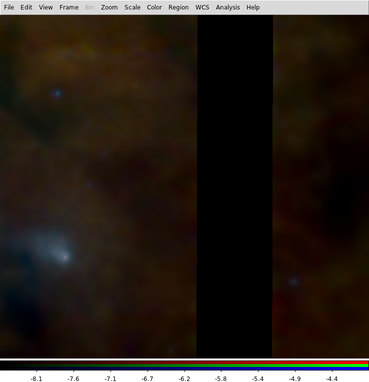

In [8]:
xpaset -p ds9 view info no
xpaset -p ds9 view buttons no
xpaset -p ds9 view panner no
xpaset -p ds9 view magnifier no
xpaset -p ds9 pan to 4586.5 4390.5 physical


import -window "SAOImage ds9" -resize 50% ds9_05_rgb_03.png 
display < ds9_05_rgb_03.png

In [9]:
xpaset -p ds9 quit

: 1